**Créditos**: baseado nun código visto en: https://medium.com/@a.fernandez.troyano/nube-de-palabras-word-cloud-con-python-a-partir-de-varias-webs-111e94220822

Repo orixinal: https://github.com/bigdatawirtz/nubes/blob/main/nube_de_respostas.ipynb

# Facendo unha nube de palabras

## Instalando dependencias

- conda activate bigdata

- conda install numpy pandas

- conda install -c conda-forge wordcloud

## Cargamos librarías

In [2]:
#Librerías básicas
import numpy as np
import pandas as pd

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')

texto = ""
fichero = open('Defino.txt','r')
try:
    linea = fichero.readline()
    while linea != '':
        texto = texto + linea
        linea = fichero.readline()
    
finally:
    fichero.close()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafael.chamorromacei\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


**Carga de texto**

In [4]:
texto = ""
fichero = open('Defino.txt','r')
try:
    linea = fichero.readline()
    while linea != '':
        texto = texto + linea
        linea = fichero.readline()
    
finally:
    fichero.close()




In [5]:
texto

'\n\nBig data es el conjunto de tecnologías que obtiene, limpia y procesa datos de gran tamaño o que puede que no encuadren bien en una\nbase de datos relacional, para poder trabajar con ellos de una manera “inteligente” .\n\n\n\nEl bigdata es una red que analiza e interpreta un gran volumen de datos\n\n\n\nChámase Big Data a grandes conxuntos de datos etiquetados e a o seu uso para diferentes aplicacións.\nEnténdese que o volume de datos é demasiado grande para ser xestionado de forma convencional.\n\n \nGrandes cantidades de datos.\n\n\nBig Data fai referencia a grandes cantidades de datos\ndos cales se poden sacar estadísticas e funcionalidades dependentes destas (computación)\nque sin chegar a ese tamaño non o permítirian.\n \nImaxe de Usuario eliminado\n\n\nGrandes cantidades de datos etiquetados difíciles de analizar y procesar\n\nBig data -> Tratamiento de una gran cantidad de datos\n \nEl big data es un conjunto de datos de mayor tamaño y más complejos, especialmente procedente

**Limpeza do texto**

In [6]:
#Generación de lista de signos de puntuación

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«",".","\n",">","/"]    

punctuation += sp_punctuation

punctuation[:10] #Ejemplo de los símbolos de puntuación que están incluidos

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [7]:
#Listado de palabras que queremos eliminar del texto
#Es un proceso iterativo por lo que si después vemos que nos siguen quedado "caractéres raros" simplemente venímos aquí y los agregamos
#Existe librerías y listados de "Stop_words", pero por ahora vamos a dejarlo vacío

#nltk.download('stopwords') #La primera vez debemos descargar las "stopwords"

stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma","después", "uso", "cualquier", "parte", "hace", "además", "según", "convencional", "pueden", "ser","de","y","estos","con","finalidad","que","su"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [8]:
elementos_a_cambiar = "áéíóú"
elementos           = "aeiou" 
for q,p in zip(elementos_a_cambiar,elementos): 
    texto = texto.replace(q,p)
texto

'\n\nBig data es el conjunto de tecnologias que obtiene, limpia y procesa datos de gran tamaño o que puede que no encuadren bien en una\nbase de datos relacional, para poder trabajar con ellos de una manera “inteligente” .\n\n\n\nEl bigdata es una red que analiza e interpreta un gran volumen de datos\n\n\n\nChamase Big Data a grandes conxuntos de datos etiquetados e a o seu uso para diferentes aplicacions.\nEntendese que o volume de datos e demasiado grande para ser xestionado de forma convencional.\n\n \nGrandes cantidades de datos.\n\n\nBig Data fai referencia a grandes cantidades de datos\ndos cales se poden sacar estadisticas e funcionalidades dependentes destas (computacion)\nque sin chegar a ese tamaño non o permitirian.\n \nImaxe de Usuario eliminado\n\n\nGrandes cantidades de datos etiquetados dificiles de analizar y procesar\n\nBig data -> Tratamiento de una gran cantidad de datos\n \nEl big data es un conjunto de datos de mayor tamaño y mas complejos, especialmente procedente

In [9]:
#Reemplazamos signos de puntuación por "":
for sw in stop_words:
    clean_texto = texto.lower().replace(sw,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")

#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
#clean_texto = " ".join(clean_texto.split())    

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)


In [10]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

**Contaxe de palabras**

In [11]:
#Generamos un diccionario para contabilizar las palabras:

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]

In [12]:
#Generamos el DF y lo ordenamos:

df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
datos,21
gran,14
data,13
big,7
conjunto,7
tamaño,5
grandes,5
cantidades,4
cantidad,3
sacar,3


**Mostrar gráfica de ocorrencias das palabras**

In [13]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

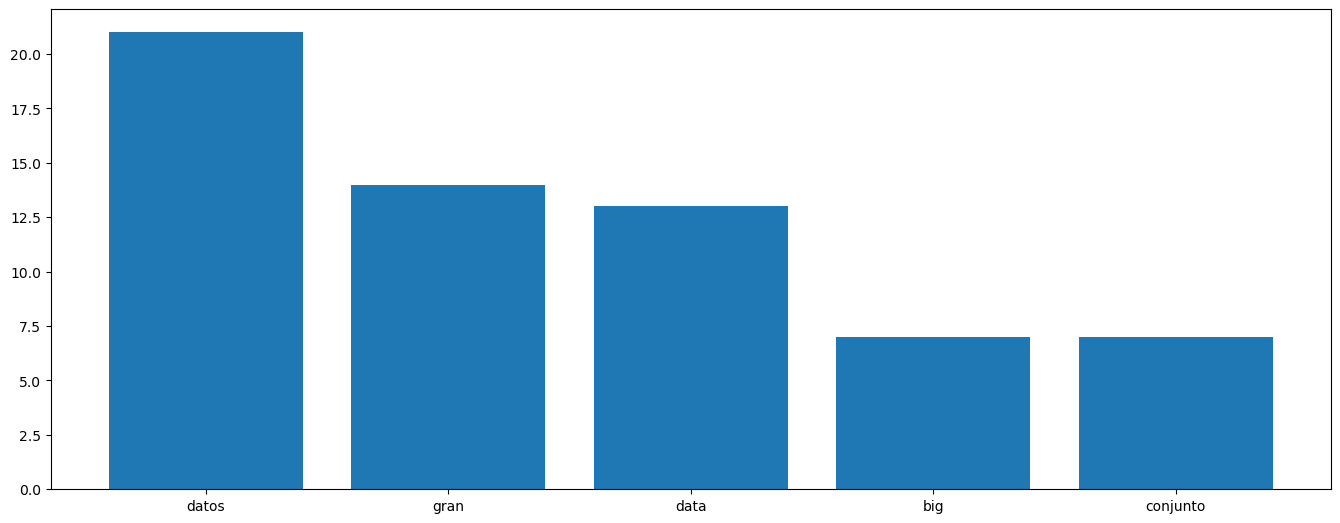

In [14]:
#Graficamos el TOP 5 palabras por frecuencia

plot_bar(data=df, top=5)

**Crear nube de palabras**

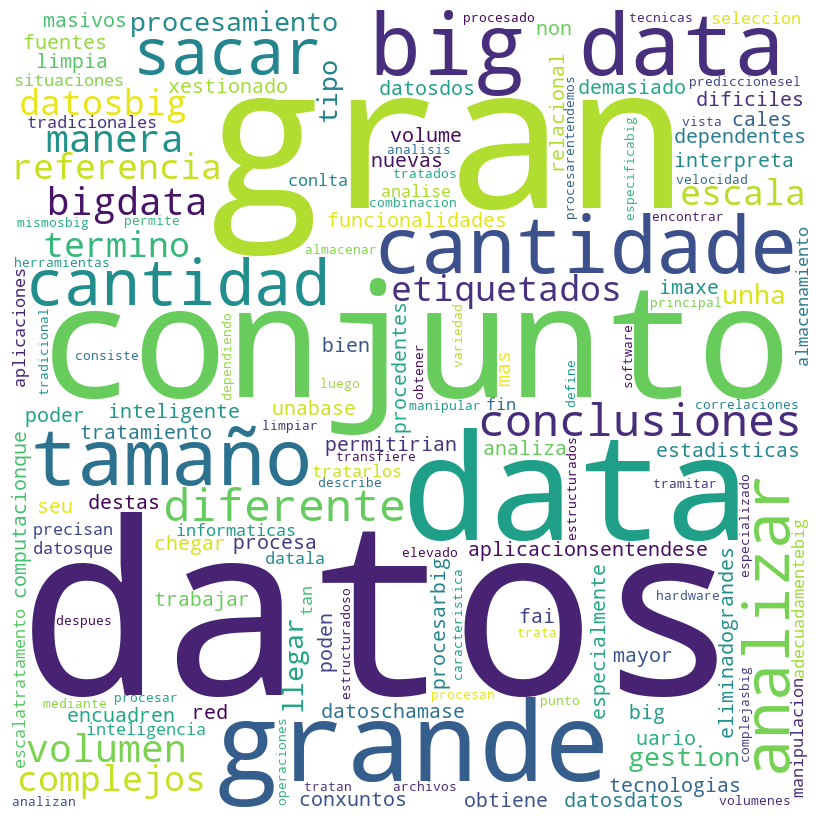

In [15]:
#word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(clean_texto)

#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada
#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()